importing neccessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

reading the dataset

In [4]:
dataset=pd.read_csv("/content/student_scores.csv")

to get number of rows and columns

In [5]:
dataset.shape

(25, 2)

In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


EDA 
feature vs target plot

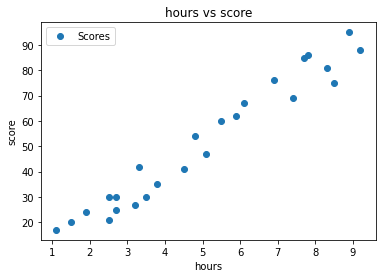

In [7]:
dataset.plot(x='Hours',y='Scores',style='o')
plt.title("hours vs score")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

finding correaltion

In [8]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


converting data frame into numpy arrays

In [9]:
dataset.Hours.values

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [10]:
dataset.Scores.values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

splitting the data

In [11]:

from sklearn.model_selection import train_test_split
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=558)
x_train.shape
y_train.shape


(20,)

scaling the data

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)


In [13]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [14]:
regressor.intercept_

48.099999999999994

In [15]:
regressor.coef_

array([24.08505323])

In [16]:
y_pred=regressor.predict(x_test)

In [17]:
regressor.predict(scaler.transform([[10]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([99.60017189])

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df
#df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
#df

,Actual,Predicted
11,62,59.835444
24,86,78.263001
22,35,39.468144
21,54,49.166859
6,88,91.841201


evaluation metrics

In [19]:
from sklearn import metrics
print("Mean absolute error",metrics.mean_absolute_error(y_test,y_pred))
print('mean squared error',metrics.mean_squared_error(y_test,y_pred))
print("r2 value",metrics.r2_score(y_test,y_pred))

Mean absolute error 4.608808315361038
mean squared error 24.524970250177596
r2 value 0.938687574374556
